# Regression
> In the previous chapter, you used image and political datasets to predict binary and multiclass outcomes. But what if your problem requires a continuous outcome? Regression is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/01-supervised-learning-with-scikit-learn/2-regression.png

> Note: This is a summary of the course's chapter 2 exercises "Supervised Learning with scikit-learn" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction to regression

### Which of the following is a regression problem?


<div class=""><p>Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.</p>
<p>Given below are four example applications of machine learning. Your job is to pick the one that is <em>best</em> framed as a <strong>regression</strong> problem.</p></div>

<pre>
Possible Answers

An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.

A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.

A restaurant using review data to ascribe positive or negative sentiment to a given review.
<b>
A bike share company using time and weather data to predict the number of bikes being rented at any given hour.</b>

</pre>

**The target variable here - the number of bike rentals at any given hour - is quantitative, so this is best framed as a regression problem.**

### Importing data for supervised learning


<div class=""><p>In this chapter, you will work with <a href="https://www.gapminder.org/data/" target="_blank" rel="noopener noreferrer">Gapminder</a> data that we have consolidated into one CSV file available in the workspace as <code>'gapminder.csv'</code>. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.</p>
<p>Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: <code>'fertility'</code>, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.</p>
<p>Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's <code>.reshape()</code> method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.</p></div>

Instructions
<ul>
<li>Import <code>numpy</code> and <code>pandas</code> as their standard aliases.</li>
<li>Read the file <code>'gapminder.csv'</code> into a DataFrame <code>df</code> using the <code>read_csv()</code> function.</li>
<li>Create array <code>X</code> for the <code>'fertility'</code> feature  and array <code>y</code> for the <code>'life'</code> target variable.</li>
<li>Reshape the arrays by using the <code>.reshape()</code> method and passing in <code>-1</code> and <code>1</code>.</li>
</ul>

In [ ]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/1-supervised-learning-with-scikit-learn/datasets/gapminder_preprocessed.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


**Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.**

### Exploring the Gapminder data


<div class=""><p>As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as <code>df</code> and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with <code>life</code>, and which ones are negatively correlated? Does this match your intuition? </p>
<p>Then, in the IPython Shell, explore the DataFrame using pandas methods such as <code>.info()</code>, <code>.describe()</code>, <code>.head()</code>. </p>
<p>In case you are curious, the heatmap was generated using <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noopener noreferrer">Seaborn's heatmap function</a> and the following line of code, where <code>df.corr()</code> computes the pairwise correlation between columns:</p>
<p><code>sns.heatmap(df.corr(), square=True, cmap='RdYlGn')</code></p>
<p>Once you have a feel for the data, consider the statements below and select the one that is <strong>not</strong> true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!</p></div>

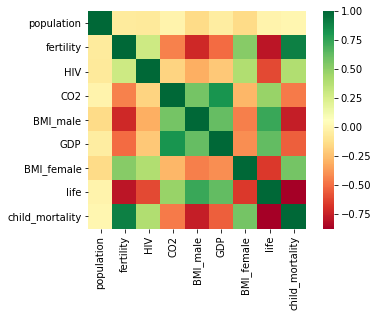

In [ ]:
#@title ⠀ { display-mode: "form" }
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

<pre>
Possible Answers

The DataFrame has 139 samples (or rows) and 9 columns.

life and fertility are negatively correlated.

The mean of life is 69.602878.

<b>fertility is of type int64.</b>

GDP and life are positively correlated.

</pre>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [ ]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


**As seen by using df.info(), fertility, along with all the other columns, is of type float64, not int64.**

## The basics of linear regression


### Fit & predict for regression

<div class=""><p>Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the <code>'RM'</code> feature of the Boston housing dataset. In this exercise, you will use the <code>'fertility'</code> feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is <code>'life'</code>. The array for the target variable has been pre-loaded as <code>y</code> and the array for <code>'fertility'</code> has been pre-loaded as <code>X_fertility</code>.</p>
<p>A scatter plot with <code>'fertility'</code> on the x-axis and <code>'life'</code> on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="0" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> score using sckit-learn's <code>.score()</code> method.</p></div>

Instructions
<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code>.</li>
<li>Create a <code>LinearRegression</code> regressor called <code>reg</code>.</li>
<li>Set up the prediction space to range from the minimum to the maximum of <code>X_fertility</code>. This has been done for you.</li>
<li>Fit the regressor to the data (<code>X_fertility</code> and <code>y</code>) and compute its predictions using the <code>.predict()</code> method and the <code>prediction_space</code> array.</li>
<li>Compute and print the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="1" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> score using the <code>.score()</code> method.</li>
<li>Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!</li>
</ul>

Text(0, 0.5, 'Life Expectancy')

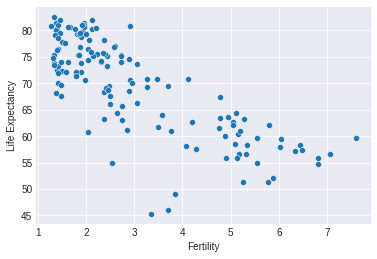

In [ ]:
X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)
plt.style.use('seaborn-darkgrid')

sns.scatterplot(x='fertility', y='life', data=df)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

0.6192442167740035


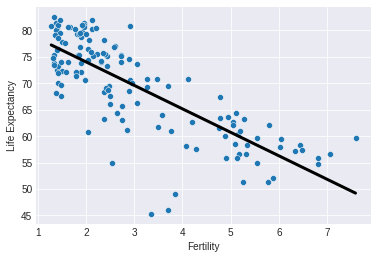

In [ ]:
sns.scatterplot(x='fertility', y='life', data=df)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

**Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!**

### Train/test split for regression

<div class=""><p>As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models. </p>
<p>In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over <strong>all</strong> features. In addition to computing the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="2" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded for you from the DataFrame <code>df</code>.</p></div>

In [ ]:
X = df.drop('life', 1)

((139, 1), (139, 8))

Instructions
<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code>, <code>mean_squared_error</code> from <code>sklearn.metrics</code>, and <code>train_test_split</code> from <code>sklearn.model_selection</code>.</li>
<li>Using <code>X</code> and <code>y</code>, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of <code>42</code>.</li>
<li>Create a linear regression regressor called <code>reg_all</code>, fit it to the training set, and evaluate it on the test set.</li>
<li>Compute and print the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="3" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> score using the <code>.score()</code> method on the test set.</li>
<li>Compute and print the RMSE. To do this, first compute the Mean Squared Error using the <code>mean_squared_error()</code> function with the arguments <code>y_test</code> and <code>y_pred</code>, and then take its square root using <code>np.sqrt()</code>.</li>
</ul>

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)


# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377226


**Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? You'll learn about this as well how to better validate your models in the next video!**

## Cross-validation


### 5-fold cross-validation


<div class=""><p>Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.</p>
<p>In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's <code>cross_val_score()</code> function uses <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="4" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.</p>
<p>The DataFrame has been loaded as <code>df</code> and split into the feature/target variable arrays <code>X</code> and <code>y</code>. The modules <code>pandas</code> and <code>numpy</code> have been imported as <code>pd</code> and <code>np</code>, respectively.</p></div>

Instructions
<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code> and <code>cross_val_score</code> from <code>sklearn.model_selection</code>.</li>
<li>Create a linear regression regressor called <code>reg</code>.</li>
<li>Use the <code>cross_val_score()</code> function to perform 5-fold cross-validation on <code>X</code> and <code>y</code>.</li>
<li>Compute and print the average cross-validation score. You can use NumPy's <code>mean()</code> function to compute the average.</li>
</ul>

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793233


**Now that you have cross-validated your model, you can more confidently evaluate its predictions.**

### K-Fold CV comparison

<div class=""><p>Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.</p>
<p>In the IPython Shell, you can use <code>%timeit</code> to see how long each 3-fold CV takes compared to 10-fold CV by executing the following <code>cv=3</code> and <code>cv=10</code>:</p>
<pre><code>%timeit cross_val_score(reg, X, y, cv = ____)
</code></pre>
<p><code>pandas</code> and <code>numpy</code> are available in the workspace as <code>pd</code> and <code>np</code>. The DataFrame has been loaded as <code>df</code> and the feature/target variable arrays <code>X</code> and <code>y</code> have been created.</p></div>

Instructions
<ul>
<li>Import <code>LinearRegression</code> from <code>sklearn.linear_model</code> and <code>cross_val_score</code> from <code>sklearn.model_selection</code>. </li>
<li>Create a linear regression regressor called <code>reg</code>.</li>
<li>Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.</li>
</ul>

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
%timeit cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
%timeit cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

100 loops, best of 3: 7.44 ms per loop
0.8718712782622107
10 loops, best of 3: 23.9 ms per loop
0.8436128620131151


**Did you use %timeit in the IPython Shell to see how much longer it takes 10-fold cross-validation to run compared to 3-fold cross-validation?**

## Regularized regression

<div class=""><p>In the video, you saw how Lasso selected out the <code>'RM'</code> feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features. </p>
<p>In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.</p>
<p>The feature and target variable arrays have been pre-loaded as <code>X</code> and <code>y</code>.</p></div>

Instructions
<ul>
<li>Import <code>Lasso</code> from <code>sklearn.linear_model</code>.</li>
<li>Instantiate a Lasso regressor with an alpha of <code>0.4</code> and specify <code>normalize=True</code>. </li>
<li>Fit the regressor to the data and compute the coefficients using the <code>coef_</code> attribute.</li>
<li>Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!</li>
</ul>

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


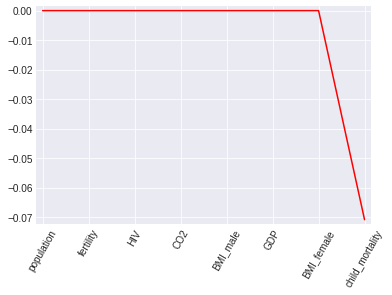

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
df_columns = X.columns
plt.plot(range(len(df_columns)), lasso_coef, color="red")
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

**According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.**

### Regularization II: Ridge


<div class=""><p>Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.</p>
<p>Recall that lasso performs regularization by adding to the loss function a penalty term of the <em>absolute</em> value of each coefficient multiplied by some alpha. This is also known as <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="23" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D43F TEX-I"></mjx-c></mjx-mi><mjx-mn class="mjx-n"><mjx-c class="mjx-c31"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></mjx-assistive-mml></mjx-container> regularization because the regularization term is the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="24" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D43F TEX-I"></mjx-c></mjx-mi><mjx-mn class="mjx-n"><mjx-c class="mjx-c31"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></mjx-assistive-mml></mjx-container> norm of the coefficients. This is not the only way to regularize, however. </p>
<p>If instead you took the sum of the <em>squared</em> values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="25" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D43F TEX-I"></mjx-c></mjx-mi><mjx-mn class="mjx-n"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></mjx-assistive-mml></mjx-container> norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="26" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> scores for each, using this function that we have defined for you, which plots the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="27" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> score as well as standard error for each alpha:</p>
<pre><code>def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
</code></pre>
<p>Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the <mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" role="presentation" tabindex="0" ctxtmenu_counter="28" style="font-size: 116.7%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msup><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D445 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: 0.363em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c32"></mjx-c></mjx-mn></mjx-script></mjx-msup></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></mjx-assistive-mml></mjx-container> score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.</p></div>

In [ ]:
#@title ⠀ { display-mode: "form" }
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')

Instructions
<ul>
<li>Instantiate a Ridge regressor and specify <code>normalize=True</code>.</li>
<li>Inside the <code>for</code> loop:<ul>
<li>Specify the alpha value for the regressor to use.</li>
<li>Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays <code>X</code> and <code>y</code>.</li>
<li>Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as <code>np</code>.</li></ul></li>
<li>Use the <code>display_plot()</code> function to visualize the scores and standard deviations.</li>
</ul>

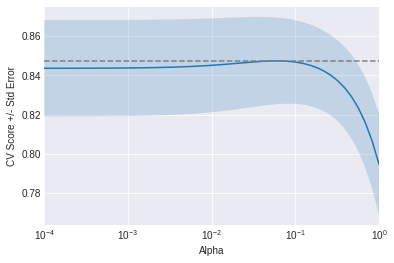

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

**Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!**